In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
%matplotlib inline

I'm using Bank Loan dataset ([Link](https://www.kaggle.com/datasets/itsmesunil/bank-loan-modelling)) from Kaggle. I chose it because it's interesting marketing case and it has a few quantitative variables



In [3]:
main = pd.read_csv('/content/Bank_Personal_Loan_Modelling.csv', sep = ';', parse_dates=True, index_col=0)
main.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,"1,60",1,0,0,1,0,0,0
2,45,19,34,90089,3,"1,50",1,0,0,1,0,0,0
3,39,15,11,94720,1,"1,00",1,0,0,0,0,0,0
4,35,9,100,94112,1,"2,70",2,0,0,0,0,0,0
5,35,8,45,91330,4,"1,00",2,0,0,0,0,0,1


In [4]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 5000 non-null   int64 
 1   Experience          5000 non-null   int64 
 2   Income              5000 non-null   int64 
 3   ZIP Code            5000 non-null   int64 
 4   Family              5000 non-null   int64 
 5   CCAvg               5000 non-null   object
 6   Education           5000 non-null   int64 
 7   Mortgage            5000 non-null   int64 
 8   Personal Loan       5000 non-null   int64 
 9   Securities Account  5000 non-null   int64 
 10  CD Account          5000 non-null   int64 
 11  Online              5000 non-null   int64 
 12  CreditCard          5000 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 546.9+ KB


we can already see that data don't have any NAs, but there is problem with CCAvg variable. It was recognized as a object type instead of integer

In [5]:
main.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.3384,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.1046,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.7742,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.5030,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.3964,1.147663,1.0,1.0,2.0,3.0,4.0
Education,5000.0,1.8810,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.4988,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.0960,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.1044,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.0604,0.238250,0.0,0.0,0.0,0.0,1.0


Experience variable somehow has negative values - need cleaning

In [6]:
df = main[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan']]

## Cleaning

1. Change 'CCAvg' column to float

In [7]:
# replace ',' with '.' in CCAvg
df['CCAvg'] = df['CCAvg'].apply(lambda x: x.replace(',', '.'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
# change Total_income type to float
df['CCAvg'] = df['CCAvg'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2. Clean 'Experience' with negative values 

Either delete rows with negative values or impute data

In [9]:
# number of obs with neg experience
len(df[df['Experience'] < 0])

52

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)

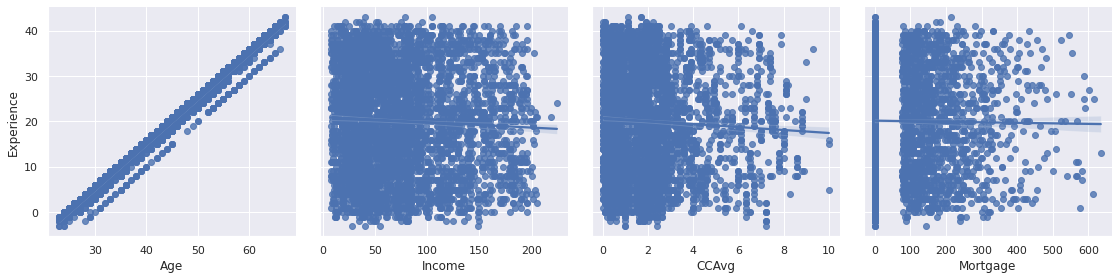

In [12]:
# check which variables correlate with experience
ncol = ['Age', 'Income','CCAvg', 'Mortgage']
grid = sns.PairGrid(df, y_vars = 'Experience', x_vars = ncol, height = 4)
grid.map(sns.regplot);

In [13]:
# get list of unique age values with negative experience
ages = df[df['Experience'] < 0]['Age'].unique().tolist()
ages

[25, 24, 28, 23, 29, 26]

In [14]:
# get indexes of negative values in 'Experience'

indexes = df[df['Experience'] < 0].index.tolist()

In [15]:
for i in indexes:
    for x in ages:
        df.loc[i,'Experience'] = df[(df.Age == x) & (df.Experience > 0)].Experience.mean()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


## EDA and Linear Model

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


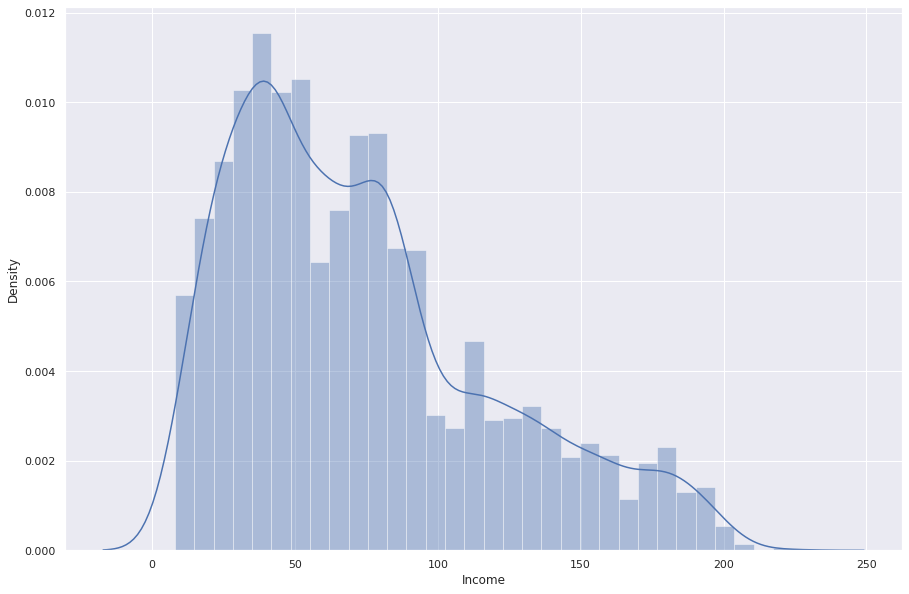

In [43]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['Income'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


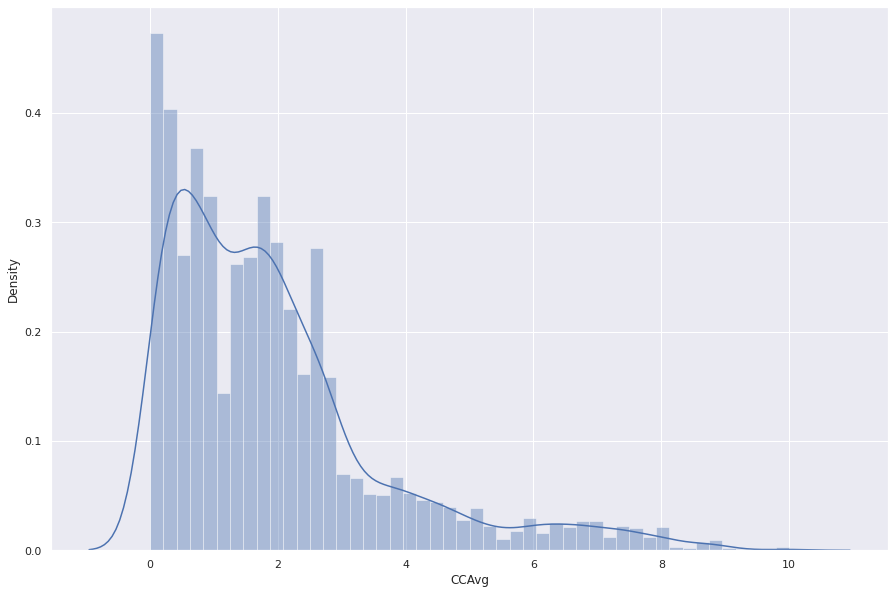

In [44]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['CCAvg'])

Both Income and CCAvg are positively skewed.

In [ ]:
df.corr()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan
Age,1.000000,0.994010,-0.055269,-0.052012,-0.012539,-0.007726
Experience,0.994010,1.000000,-0.046959,-0.049877,-0.011046,-0.008338
Income,-0.055269,-0.046959,1.000000,0.645984,0.206806,0.502462
CCAvg,-0.052012,-0.049877,0.645984,1.000000,0.109905,0.366889
Mortgage,-0.012539,-0.011046,0.206806,0.109905,1.000000,0.142095
Personal Loan,-0.007726,-0.008338,0.502462,0.366889,0.142095,1.000000


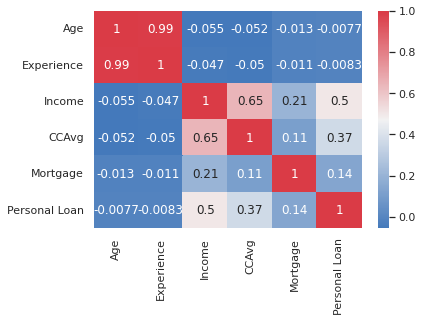

In [ ]:
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(df.corr(), cmap = cmap, annot = True);

Let's try to build linear regression model for Income. <br>
We see that Income is highly correlated with CCAvg

In [16]:
from sklearn.linear_model import LinearRegression

In [27]:
# Prepare vectors
X = df['CCAvg'].values.reshape((-1,1)).astype(np.float32)
y = df['Income'].values.reshape(-1,1).astype(np.float32)

In [46]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [47]:
# Create a regressor instance
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [48]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[40.665344]
[[17.044931]]


The value of intercept (40.7) shows what will be the value of response variable (here its Income) when predictor is zero (here its CCAVG). <br>The value of the slope = 17 means that the predicted response (Income) rises by 17 thousands when predictor (CCAvg score) is increased by one.

In [49]:
r_sq = regressor.score(X_train, y_train)
r_sq

0.4213421287655138

R-squared value for linear regression model is usually interpreted as 'how much of variation in response variable is explained by variation of predictor variable'. <br>Here we see that 42% of Income variation is explained by CCAvg variation. <br>NOTE: it should not be understood as causation 

In [50]:
# Forecast/predictions
y_pred = regressor.predict(X_test)

# Compare actual values to predicted
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
data

,Actual,Predicted
0,72.0,54.301289
1,45.0,62.823753
2,25.0,57.710274
3,84.0,50.892303
4,31.0,57.710274
...,...,...
995,41.0,81.573181
996,31.0,47.483318
997,120.0,86.686661
998,23.0,54.301289


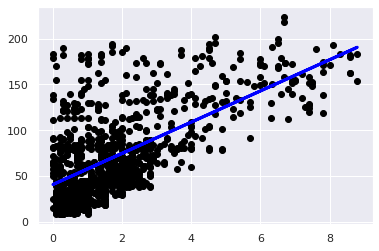

In [37]:
# Plot actual values vs regression line
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 28.119537
Mean Squared Error: 1327.86
Root Mean Squared Error: 36.43981


Mean Absolute Error is the average of the absolute difference between the target value and the value predicted by the model. In this case our model gives the mean absolute error equal to 28.1. <br>
Mean Squared Error is the average of the squared difference between the predicted and actual value. The closer it is to zero - the better. Also, used for models comparison. <br>
Root Mean Squared Error is the square root of the mean of the squared errors.

From all metrics we see that our model needs a lot of improvement.